In [65]:
import pandas as pd
import requests
from bs4 import BeautifulSoup

Install Pandas, Requests, and BeautifulSoup

In [66]:
wikiurl = 'https://en.wikipedia.org/wiki/List_of_cities_in_India_by_population'
table_class = 'wikitable sortable jquery-tablesorter'
get_url = requests.get(wikiurl)
print(get_url.status_code)

200


 Request for the HTML response using the URL

In [67]:
soup = BeautifulSoup(get_url.text, 'html.parser')
indiatable=soup.find('table',{'class':"wikitable"})
print(indiatable)

<table class="wikitable sortable" style="width:100%; text-align:center;">
<caption>
</caption>
<tbody><tr>
<th style="width:5%;">Rank
</th>
<th style="width:15%;">City
</th>
<th style="width:25%;">Population<br/>(2011)<sup class="reference" id="cite_ref-Cities1Lakhandabove_3-0"><a href="#cite_note-Cities1Lakhandabove-3">[3]</a></sup>
</th>
<th style="width:25%;">Population<br/>(2001)
</th>
<th style="width:30%;">State or union territory
</th></tr>
<tr>
<td>1</td>
<td><b><a href="/wiki/Mumbai" title="Mumbai">Mumbai</a></b></td>
<td>12,442,373</td>
<td>11,978,450</td>
<td><a href="/wiki/Maharashtra" title="Maharashtra">Maharashtra</a>
</td></tr>
<tr>
<td>2</td>
<td><b><a href="/wiki/Delhi" title="Delhi">Delhi</a></b></td>
<td>11,007,835</td>
<td>9,879,172</td>
<td><a href="/wiki/Delhi" title="Delhi">Delhi</a>
</td></tr>
<tr>
<td>3</td>
<td><b><a href="/wiki/Bangalore" title="Bangalore">Bangalore</a> </b></td>
<td>8,425,970</td>
<td>4,301,326</td>
<td><a href="/wiki/Karnataka" title="Karn

Parse data from the HTML

In [68]:
df=pd.read_html(str(indiatable))
# convert list to dataframe
df=pd.DataFrame(df[0])
df.head()

,Rank,City,Population(2011)[3],Population(2001),State or union territory
0,1,Mumbai,12442373,11978450,Maharashtra
1,2,Delhi,11007835,9879172,Delhi
2,3,Bangalore,8425970,4301326,Karnataka
3,4,Hyderabad,6809970,3637483,Telangana
4,5,Ahmedabad,5570585,3520085,Gujarat


Convert Wikipedia Table into a Python Dataframe

In [69]:
data = df.drop(["Rank", "State or union territory"], axis=1)
# rename columns for ease
data = data.rename(columns={"Population(2011)[3]": "2011 Population","Population(2001)":"2001 Population"})
print(data.head())

        City 2011 Population 2001 Population
0     Mumbai        12442373        11978450
1      Delhi        11007835         9879172
2  Bangalore         8425970         4301326
3  Hyderabad         6809970         3637483
4  Ahmedabad         5570585         3520085


Clean the Data by dropping and renaming 

In [70]:
data = data[data["2001 Population"].str.contains("-|―|–|—| ")==False]
population_two = data["2001 Population"]

float_population_two = []
for i in population_two:
    i = str(i)
    i = float(i)
    float_population_two.append(i)
print(float_population_two)
data["2001 Population"] = float_population_two

[11978450.0, 9879172.0, 4301326.0, 3637483.0, 3520085.0, 4343645.0, 4572876.0, 2433835.0, 1690000.0, 2538473.0, 2322575.0, 2185927.0, 2551337.0, 2052066.0, 1474968.0, 1262551.0, 1437354.0, 1345938.0, 1012472.0, 1366444.0, 968256.0, 1398467.0, 1275134.0, 1077236.0, 1055938.0, 1039405.0, 967476.0, 1193512.0, 693350.0, 1091918.0, 898440.0, 873311.0, 1065327.0, 966862.0, 704002.0, 975393.0, 1007532.0, 847093.0, 827026.0, 932484.0, 930882.0, 851282.0, 851051.0, 928869.0, 605747.0, 694316.0, 808515.0, 809895.0, 872478.0, 786195.0, 718395.0, 762408.0, 669087.0, 173542.0, 672315.0, 706043.0, 752066.0, 648032.0, 696760.0, 520388.0, 368618.0, 598741.0, 455754.0, 622701.0, 514461.0, 549510.0, 529690.0, 305058.0, 573096.0, 556366.0, 530636.0, 534654.0, 279102.0, 596473.0, 511085.0, 426674.0, 493405.0, 475439.0, 430733.0, 493167.0, 485575.0, 422569.0, 120945.0, 430427.0, 472374.0, 473731.0, 383644.0, 436781.0, 369959.0, 378428.0, 399565.0, 399653.0, 443518.0, 411831.0, 409403.0, 385432.0, 310967.0,

getting rid of null/noise in the data by deleting those rows

In [71]:
population = data["2011 Population"]
float_population = []
for i in population:
    i = str(i)
    i = i.replace(" [5]", "")
    i = i.replace(",","")
    i = float(i)
    float_population.append(i)
print(float_population)
data["2011 Population"] = float_population

[12442373.0, 11007835.0, 8425970.0, 6809970.0, 5570585.0, 4681087.0, 4486679.0, 4467797.0, 3552371.0, 3115431.0, 3046163.0, 2815601.0, 2767031.0, 2405665.0, 1960631.0, 1818872.0, 1798218.0, 1728128.0, 1727692.0, 1684222.0, 1648643.0, 1618879.0, 1585704.0, 1486053.0, 1414050.0, 1305429.0, 1286678.0, 1247327.0, 1222390.0, 1201815.0, 1180570.0, 1175116.0, 1162472.0, 1132383.0, 1120547.0, 1112544.0, 1077075.0, 1073427.0, 1069276.0, 1055525.0, 1050721.0, 1034358.0, 1033918.0, 1017865.0, 1010087.0, 1001694.0, 960787.0, 957352.0, 951558.0, 943788.0, 903668.0, 893062.0, 887871.0, 876969.0, 874408.0, 862886.0, 847387.0, 843402.0, 829267.0, 809378.0, 743691.0, 709665.0, 705478.0, 673446.0, 647508.0, 647057.0, 644406.0, 637272.0, 631364.0, 625700.0, 615998.0, 610189.0, 604214.0, 602046.0, 593368.0, 569578.0, 566517.0, 563917.0, 550439.0, 549236.0, 542321.0, 533587.0, 516082.0, 515215.0, 513264.0, 506098.0, 505693.0, 502793.0, 502197.0, 499575.0, 488968.0, 488157.0, 479920.0, 473637.0, 471312.0, 4

getting rid of null/noise in the data by deleting those rows

Text(0.5, 1.0, 'Population for 2001 and 2011')

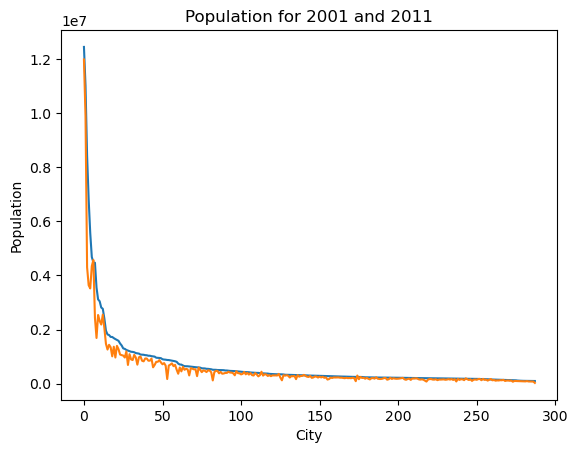

In [72]:
from matplotlib import pyplot as plt
plt.plot(float_population)
plt.plot(float_population_two)
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Population for 2001 and 2011')

plotting the 2001 and 2011 population data for India's major cities

In [73]:
import numpy as np

difference_data = np.subtract(float_population,float_population_two)
print(difference_data)

[ 4.639230e+05  1.128663e+06  4.124644e+06  3.172487e+06  2.050500e+06
  3.374420e+05 -8.619700e+04  2.033962e+06  1.862371e+06  5.769580e+05
  7.235880e+05  6.296740e+05  2.156940e+05  3.535990e+05  4.856630e+05
  5.563210e+05  3.608640e+05  3.821900e+05  7.152200e+05  3.177780e+05
  6.803870e+05  2.204120e+05  3.105700e+05  4.088170e+05  3.581120e+05
  2.660240e+05  3.192020e+05  5.381500e+04  5.290400e+05  1.098970e+05
  2.821300e+05  3.018050e+05  9.714500e+04  1.655210e+05  4.165450e+05
  1.371510e+05  6.954300e+04  2.263340e+05  2.422500e+05  1.230410e+05
  1.198390e+05  1.830760e+05  1.828670e+05  8.899600e+04  4.043400e+05
  3.073780e+05  1.522720e+05  1.474570e+05  7.908000e+04  1.575930e+05
  1.852730e+05  1.306540e+05  2.187840e+05  7.034270e+05  2.020930e+05
  1.568430e+05  9.532100e+04  1.953700e+05  1.325070e+05  2.889900e+05
  3.750730e+05  1.109240e+05  2.497240e+05  5.074500e+04  1.330470e+05
  9.754700e+04  1.147160e+05  3.322140e+05  5.826800e+04  6.933400e+04
  8.53

getting the difference between the two years to see the change in population

Text(0.5, 1.0, 'Change in Population from 2001 to 2011')

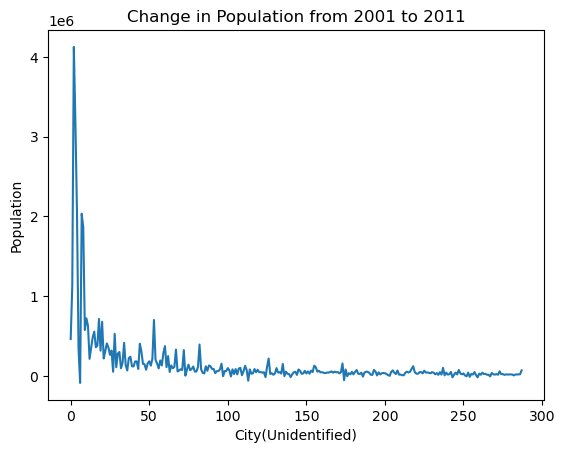

In [74]:
plt.plot(difference_data)
plt.xlabel('City(Unidentified)')
plt.ylabel('Population')
plt.title('Change in Population from 2001 to 2011')

plotting the change in population

In [75]:
city_names = data["City"]
new_city = []
for t in city_names: 
    t = str(t)
    t = t.replace("[4]","")
    t = t.replace("[5]","")
    t = t.replace("[6]","")
    t = t.replace("[7]","")
    t = t.replace("[8]","")
    t = t.replace("[9]","")
    t = t.replace("[10]","")
    t = t.replace("[11]","")
    t = t.replace("[12]","")
    t = t.replace("[13]","")
    t = t.replace("[14]","")
    t = t.replace("[15]","")
    t = t.replace("[16]","")
    t = t.replace("[17]","")
    t = t.replace("[18]","")
    t = t.replace("[19]","")
    t = t.replace("[20]","")
    t = t.replace("[21]","")
    t = t.replace("[22]","")
    t = t.replace("[23]","")
    t = t.replace("[24]","")
    t = t.replace("[25]","")
    t = t.replace("[26]","")
    t = t.replace("[27]","")
    t = t.replace("[28]","")
    t = t.replace("[29]","")
    t = t.replace("[30]","")
    t = t.replace("[31]","")
    t = t.replace("[32]","")
    t = t.replace("[33]","")
    t = t.replace("[34]","")
    t = t.replace("[35]","")
    t = t.replace("[36]","")
    new_city.append(t)
data["City"] = new_city
print(new_city)

['Mumbai', 'Delhi', 'Bangalore', 'Hyderabad', 'Ahmedabad', 'Chennai', 'Kolkata', 'Surat', 'Vadodara', 'Pune', 'Jaipur', 'Lucknow', 'Kanpur', 'Nagpur', 'Indore', 'Thane', 'Bhopal', 'Visakhapatnam', 'Pimpri-Chinchwad', 'Patna', 'Ghaziabad', 'Ludhiana', 'Agra', 'Nashik', 'Faridabad', 'Meerut', 'Rajkot', 'Kalyan-Dombivli', 'Vasai-Virar', 'Varanasi', 'Srinagar', 'Aurangabad', 'Dhanbad', 'Amritsar', 'Navi Mumbai', 'Allahabad', 'Howrah', 'Ranchi', 'Gwalior', 'Jabalpur', 'Coimbatore', 'Vijayawada', 'Jodhpur', 'Madurai', 'Raipur', 'Kota', 'Chandigarh', 'Guwahati', 'Solapur', 'Hubli–Dharwad', 'Bareilly', 'Mysore', 'Moradabad', 'Gurgaon', 'Aligarh', 'Jalandhar', 'Tiruchirappalli', 'Bhubaneswar', 'Salem', 'Mira-Bhayandar', 'Thiruvananthapuram', 'Bhiwandi', 'Saharanpur', 'Gorakhpur', 'Guntur', 'Amravati', 'Bikaner', 'Noida', 'Jamshedpur', 'Bhilai', 'Warangal', 'Cuttack', 'Firozabad', 'Kochi', 'Bhavnagar', 'Dehradun', 'Durgapur', 'Asansol', 'Nanded', 'Kolhapur', 'Ajmer', 'Gulbarga', 'Loni', 'Ujjain'

Cleaning the names of cities and making it a string 

Text(0.5, 1.0, 'Change in Population from 2001 to 2011')

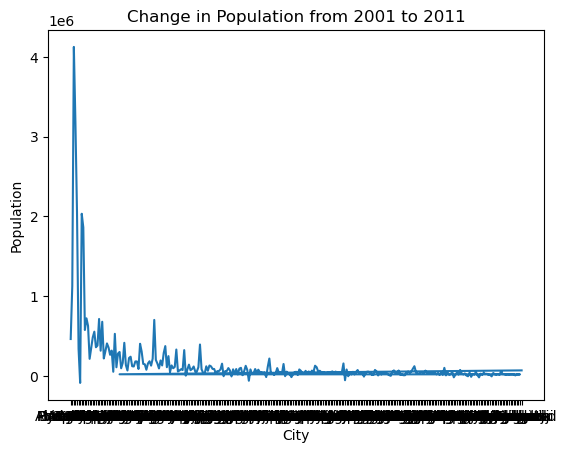

In [76]:
plt.plot(new_city, difference_data)
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Change in Population from 2001 to 2011')

changing the x axis values to the actual city names

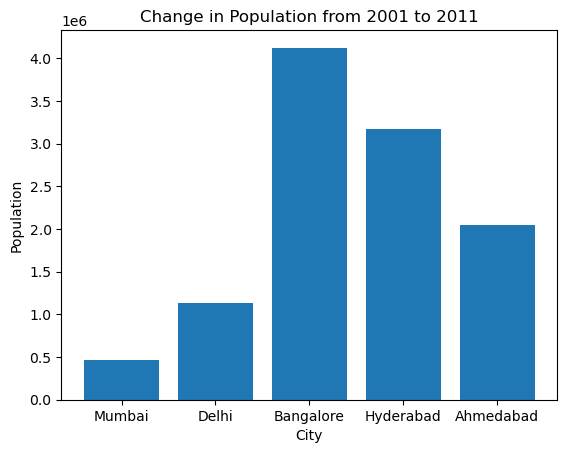

In [84]:
plt.bar(new_city[0:5],difference_data[0:5])
plt.xlabel('City')
plt.ylabel('Population')
plt.title('Change in Population from 2001 to 2011')
plt.savefig('ChangeInPopulationForFiveIndianCities.png')

plotting 5 change in population as a bar graph

In [78]:
from scipy.stats import pearsonr

p = pearsonr(float_population,float_population_two)
print (p[0])

0.9683412631656636


The data from 2001 Population and 2011 Population is strongly correlated and probably indicates a consistent growth throughout the 

In [79]:
data["Change in Population"] = difference_data
data.to_csv('Change_in_population_India.csv')

In [80]:
data["Change in Population"].describe()

count    2.880000e+02
mean     1.460759e+05
std      3.812982e+05
min     -8.619700e+04
25%      2.691225e+04
50%      5.103550e+04
75%      1.119425e+05
max      4.124644e+06
Name: Change in Population, dtype: float64